In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from cat import Cat

In [2]:
MAXROW = 20
MAXCOL = 30

In [3]:
def processline(linelist):
    newlist = [(int(l.split(",")[0]),int(l.split(",")[1])) for l in linelist[1:]]
    return newlist
    
def read_data(filename):
    file = open(filename,'r')
    data = file.readlines()
    lists = []
    for line in data:
        new_list = processline(line.split(":"))
        lists.append(new_list)
    foodlist = lists [0]
    waterlist = lists [1]
    bedlist = lists [2]
    boxlist = lists [3]
    return foodlist, waterlist, bedlist, boxlist

def move_em(current, moves):
    nextgrid = np.zeros(current.shape, dtype="int16")
    
    for row in range(MAXROW):
        for col in range(MAXCOL):
            for g in range(current[row,col]):
                nextrow = row + random.choice(moves)
                nextcol = col + random.choice(moves)
                if nextrow < 0:
                    nextrow = 0
                if nextcol < 0:
                    nextcol = 0
                if nextrow >= MAXROW:
                    nextrow = MAXROW - 1
                if nextcol >= MAXCOL:
                    nextcol = MAXCOL - 1
                nextgrid[nextrow, nextcol] += 1
    return nextgrid

def rule1(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    pop[row, col] -= 1
                    marksList.append(-5)
                    print("CAT KILLED")
                    
def rule2(pop, datalist, marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if (row, col) in datalist:
                for g in range(pop[row,col]):
                    marksList.append(10)
                    print("CAT GET ENERGY")
                    
def rule3(array1, array2 , marksList):
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if array1[row,col]>0 and array2[row,col]>0:
                for k in range(array1[row,col]):
                    array1[row, col] += 1
                    array2[row,col] -= 1
                    print("CAT PERSONALITY CHANGE")

def make_feature_scatter_boost(itemlist, colour, plotData):
    xlist = []
    ylist = []
    for r,c in itemlist:
        ylist.append(MAXROW - r - 1)  
        xlist.append(c) 
    plotData.append([ str(xlist), str(ylist), '^'])
    plt.scatter(xlist,ylist,color=colour, marker='^')
    
def make_feature_scatter_barriers(itemlist, colour, plotData):
    xlist = []
    ylist = []
    for r,c in itemlist:
        ylist.append(MAXROW - r - 1)  
        xlist.append(c) 
    plotData.append([ str(xlist), str(ylist), 'X'])
    plt.scatter(xlist,ylist,color=colour, marker='X')
    
def make_my_scatter(pop, colour, plotData):
    xlist = []
    ylist = []
    slist = []
    for row in range(MAXROW):
        for col in range(MAXCOL):
            if pop[row,col] > 0:
                ylist.append(MAXROW - row - 1)  
                xlist.append(col) 
                slist.append(pop[row,col]*20) 
    plotData.append([ str(xlist), str(ylist), 'o'])
    plt.scatter(xlist,ylist,s=slist,color=colour, marker='o')

In [4]:
def ask_questions(questions):
    FriendlyCats = []
    AggressiveCats = []
    answerList=[]
    
    try:
        for question in questions:
            answer = input(question)
            answerList.append(answer)

        q1 = int(answerList[0])
        q2 = answerList[1]
        q3 = int(answerList[2])
        q4 = int(answerList[3])

        for a in range(q3):
            if(q1==1):
                FriendlyCats.append(Cat("Male", q2, "Friendly"))
            elif(q1==2):
                FriendlyCats.append(Cat("Female", q2, "Friendly"))
            else:
                print("OUT OF RANGE")

        for b in range(q4):
            if(q1==1):
                AggressiveCats.append(Cat("Male", q2, "Aggressive"))
            elif(q1==2):
                AggressiveCats.append(Cat("Female", q2, "Aggressive"))
            else:
                print("OUT OF RANGE")

        return FriendlyCats, AggressiveCats
    
    except:
        print("An exception occurred")

In [5]:
def main():
    print("\n**********WELCOME TO GAME OF CATS (VILLAGE)**********\n ")
    
    questions = [
     "Cats gender?\n(1) Male \n(2) Female\n",
     "Cats age group?\n(1)Kitten \n(2)Junior \n(3)Prime \n(4)Mature \n(5)Senior\n",
     "Friendly Cats Count?\n",
     "Aggressive Cats Count?\n"
    ]

    friendlyCartList, aggressiveCartList = ask_questions(questions)
    
    pointsList = []
    plotData = []
    
    friendlyArray = np.zeros((MAXROW,MAXCOL), dtype="int16")
    aggressiveArray = np.zeros((MAXROW,MAXCOL), dtype="int16")

    food, water, bed, boxes = read_data("cat.txt") 
    
    moves  = [-1,0,1]
#     moves  = [-2,-1,0,1,2]
    print("--- CAT VILLAGE ---")
    for friendlyCart in friendlyCartList:
        print(friendlyCart)
        friendlyArray[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
        
    for aggressiveCart in aggressiveCartList:
        print(aggressiveCart)
        aggressiveArray[random.randint(0,MAXROW-1),random.randint(0,MAXCOL-1)] += 1 
        

    # Simulation
    for t in range(10): # Simulation Time 10s
        try:
            friendlynext = move_em(friendlyArray, moves)
            aggressivenext = move_em(aggressiveArray, moves)

            rule1(friendlynext, bed, pointsList)
            rule1(friendlynext, boxes, pointsList)
            rule2(friendlynext, food, pointsList)
            rule2(friendlynext, water, pointsList)
            rule3(friendlynext, aggressivenext, pointsList)
            
            rule1(aggressivenext, bed, pointsList)
            rule1(aggressivenext, boxes, pointsList)
            rule2(aggressivenext, food, pointsList)
            rule2(aggressivenext, water, pointsList)
            rule3(aggressivenext, friendlynext, pointsList)

            friendlyArray = friendlynext
            aggressiveArray = aggressivenext

            make_my_scatter(friendlyArray, "b", plotData)
            make_my_scatter(aggressiveArray, "r", plotData)
            
            make_feature_scatter_boost(food, "#f0ad4e", plotData)
            make_feature_scatter_boost(water, "#5bc0de", plotData)
            
            make_feature_scatter_barriers(bed, "#d9534f", plotData)
            make_feature_scatter_barriers(boxes, "#f7f7f7", plotData)
            
            
            plt.title("Cat Simulation (time = " + str(t) + ")")
            plt.rcParams['axes.facecolor']='black'
            plt.xlabel("Columns")
            plt.ylabel("Rows")
            plt.xlim(-1,MAXCOL)
            plt.ylim(-1,MAXROW)
            plt.savefig('Cat_Simulation.png')
            plt.pause(1)
            plt.clf()
            
            print("Score {}".format(sum(pointsList)))
        except:
              print("An exception occurred")
                
    print("Friendly Cats Count {}".format(len(friendlyArray)))
    print("Aggressive Cats Count {}".format(len(aggressiveArray)))
    
    plotToCSV = np.array(plotData)
    np.savetxt('plotData.csv', plotToCSV, fmt="%s", delimiter=',')
                
    if(sum(pointsList)>0):
        print("GAME WON")
    elif(sum(pointsList)==0):
        print("GAME DRAW")
    else:
        print("GAME LOSE")


**********WELCOME TO GAME OF CATS (VILLAGE)**********
 
Cats gender?
(1) Male 
(2) Female
1
Cats age group?
(1)Kitten 
(2)Junior 
(3)Prime 
(4)Mature 
(5)Senior)
1
Friendly Cats Count?
2
Aggressive Cats Count?
5
--- Cat Class Added ---
--- Cat Class Added ---
--- Cat Class Added ---
--- Cat Class Added ---
--- Cat Class Added ---
--- Cat Class Added ---
--- Cat Class Added ---
--- CAT VILLAGE ---
Age group -- 1, Gender -- Male, Personality -- Friendly
Age group -- 1, Gender -- Male, Personality -- Friendly
Age group -- 1, Gender -- Male, Personality -- Aggressive
Age group -- 1, Gender -- Male, Personality -- Aggressive
Age group -- 1, Gender -- Male, Personality -- Aggressive
Age group -- 1, Gender -- Male, Personality -- Aggressive
Age group -- 1, Gender -- Male, Personality -- Aggressive


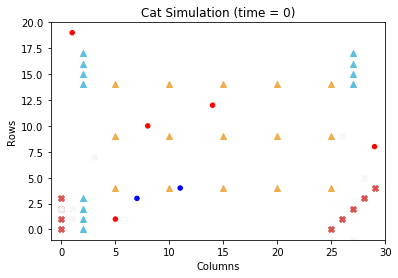

Score 0


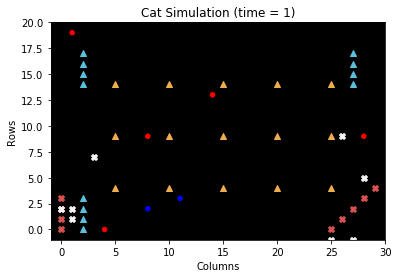

Score 0
CAT GET ENERGY


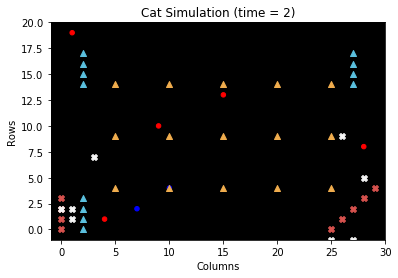

Score 10


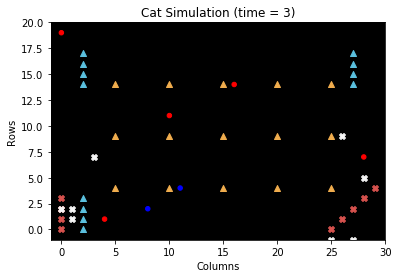

Score 10


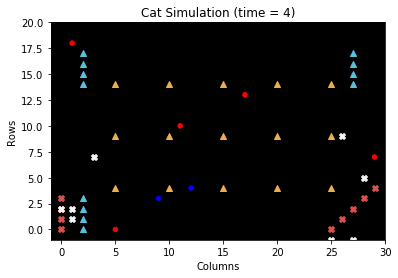

Score 10
CAT GET ENERGY


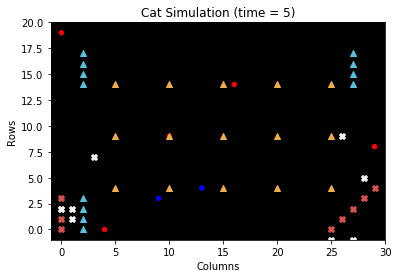

Score 20
CAT GET ENERGY


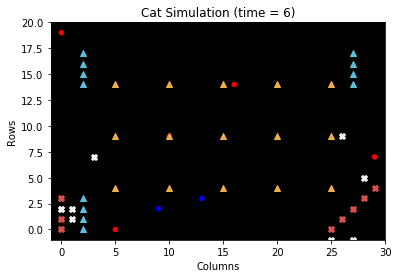

Score 30


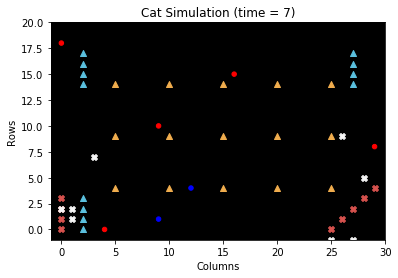

Score 30
CAT GET ENERGY
CAT GET ENERGY


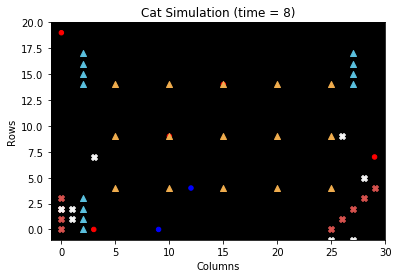

Score 50


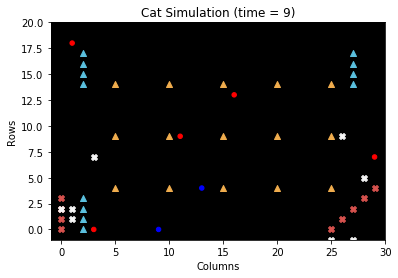

Score 50
Friendly Cats Count 20
Aggressive Cats Count 20
GAME WON


<Figure size 432x288 with 0 Axes>

In [6]:
if __name__ == "__main__":
    main()